# Prediction of Students Dropout and Academic Success

<span style="display:block; text-align:center">

**A Project by:**<br>
Cristal Rivera <br> 
Anton Donle


 **Course Name:**<br>
Topics on Machine Learning and its Applications

## 1. Problem Definition and Dataset Selection

### 1.1 Problem Definition

As students of the AISS program, we set out to analyze factors that may contribute to student dropoutin higher education and explore how these can be predicted using machine learning. This issue has been widely researched in many countries, with efforts focused on measuring dropout rates and developing strategies to prevent early school leaving.

In Portugal, the school dropout rate had been steadily declining for the past 18 years. However, in 2023, it rose from 6.5% to 8%. In a related interview, it was noted that boys tend to drop out of school more often than girls. According to the researcher, this may be due to boys generally receiving lower grades than girls in teachers’ internal assessments. This gender gap has widened in recent years and is observed not only in Portugal but also across several other countries (Nova School of Business and Economics, 2023).

The European Commission (2023) reported that, under the national goal set by the Europe 2020 Strategy, Portugal aimed to reduce the early school leaving rate to 10%. To achieve this, various cross-sectoral and inter-institutional initiatives have been implemented to prevent and address early school leaving.

Despite the efforts made during this period, dropout remained a significant issue in Portuguese higher education due to its long-term social and economic consequences. According to Portdata (2023), Portugal currently ranks 13th out of the 27 EU countries with the lowest student dropout percentage.

The goal of this project is not only to evaluate machine learning models for predictive accuracy and performance  and compare our results with the exisiting efforts of analyzing the same problem. Also, to establish a generalized analytical framework, that can potentially be adapted by other countries, including Portugal, to monitor, understand, and ultimately reduce early school leaving rates.

### 1.2 Dataset Selection

For this project, we selected a dataset from the UC Irvine Machine Learning Repository titled “Predict Students' Dropout and Academic Success,” donated on December 12, 2021. This dataset is supported by the SATDAP – Capacitação da Administração Pública program under grant POCI-05-5762-FSE-000191, Portugal. It was developed as part of a project to reduce academic dropout and failure in higher education.

The data includes records of students enrolled between the academic years 2008/2009 (following the implementation of the Bologna Process in European higher education) and 2018/2019. It tracks students starting from Fall 2008 through Fall 2018, focusing on their year of initial enrollment and subsequent academic progress.

Link to data set: 
https://archive.ics.uci.edu/dataset/697/predict+students+dropout+and+academic+success


### 1.3 Import Data Set

We proceed to import the dataset and the required dependency libraries needed throughout the project analysis

In [1]:
## Import Required Dependencies
import numpy as np
import pandas as pd
from sklearn.svm import SVC

#visualization
import matplotlib.pyplot as plt
import seaborn as sns

#Evaluation Metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report, roc_auc_score
from sklearn.metrics import ConfusionMatrixDisplay

In [2]:
#Load Dataset, seperate on ;
data = pd.read_csv('data.csv', sep = ';')
#look at data
data[0:100]

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,1,15,1,9119,1,1,130.0,26,38,3,...,0,5,11,3,13.250000,0,13.9,-0.3,0.79,Enrolled
96,1,1,5,9773,1,1,135.0,1,37,1,...,0,6,6,6,13.333333,0,8.9,1.4,3.51,Graduate
97,1,1,5,9500,1,1,132.0,1,37,37,...,0,8,9,8,14.477778,0,12.4,0.5,1.79,Graduate
98,1,1,1,9085,1,1,135.0,1,1,2,...,0,5,7,5,13.800000,0,12.7,3.7,-1.70,Enrolled


In [3]:
# Get the number of rows and columns
num_rows, num_cols = data.shape

print(f"Number of rows: {num_rows}")
print(f"Number of columns: {num_cols}")


Number of rows: 4424
Number of columns: 37


This initial overview of the dataset shows that it is not high-dimensional, as it contains 4,424 examples and 37 columns. However, a more detailed analysis will be presented in Section 2: Exploratory Data Analysis (EDA), where we will further examine the dataset to better understand its structure and prepare it for the application of machine learning techniques.

## 2. Exploratory Data Analysis

In this section, we explore the structure, distribution, and key characteristics of the dataset to gain insights and identify potential challenges before applying machine learning models.

### 2.1. General data analysis

In [4]:
#Information of columns: Nulls and datatypes
summary = pd.DataFrame({
    'Column': data.columns,
    'Null Count': data.isnull().sum().values,
    'Dtype': data.dtypes.values
})
summary
#summary[summary['Dtype'] == 'int64'].count()

,Column,Null Count,Dtype
0,Marital status,0,int64
1,Application mode,0,int64
2,Application order,0,int64
3,Course,0,int64
4,Daytime/evening attendance\t,0,int64
5,Previous qualification,0,int64
6,Previous qualification (grade),0,float64
7,Nacionality,0,int64
8,Mother's qualification,0,int64
9,Father's qualification,0,int64


In [5]:
#checking for duplicates
duplicates = data.duplicated().sum()
print('There are',duplicates,'duplicates in the dataset')

There are 0 duplicates in the dataset


Out of the 37 columns, 7 are read as integers, 29 as floats, and 1 as an object. There are no null values or duplicates.

In [6]:
#Opening txt files from the variables to show the categorical variables that are encoded.
file_path = 'variables.txt'
try:
    with open(file_path, 'r') as file:
        content = file.read()
        print(content)
except FileNotFoundError:
    print(f"Error: File not found at {file_path}")
    

# %%
"""
Table of Variables:

Variable Name                  | Data Type | Measurement | Description                                                                 | Categories (if applicable)
---------------------------------|-----------|-------------|---------------------------------------------------------------------------|----------------------------
Marital status                 | Integer   | Nominal     | Student's marital status                                                    | 1-Single, 2-Married, 3-Widower, 4-Divorced, 5-Co-habitant, 6-Separated
Application mode               | Integer   | Ordinal     | Type of application                                                         | 17 distinct values mentioned
Application order              | Integer   | Ordinal     | Application order within the group                                          | -
Course                         | Integer   | Nominal     | Student's degree course                                              

##===mention which are the columns that are encoded and analyze the ones that are numerical

In [7]:
numerical_variables = data[[
    'Admission grade',
    'Previous qualification (grade)',
    'Age at enrollment',
    'Curricular units 1st sem (credited)',
    'Curricular units 1st sem (enrolled)',
    'Curricular units 1st sem (evaluations)',
    'Curricular units 1st sem (approved)',
    'Curricular units 1st sem (grade)',
    'Curricular units 1st sem (without evaluations)',
    'Curricular units 2nd sem (credited)',
    'Curricular units 2nd sem (enrolled)',
    'Curricular units 2nd sem (evaluations)',
    'Curricular units 2nd sem (approved)',
    'Curricular units 2nd sem (grade)',
    'Curricular units 2nd sem (without evaluations)'
]]

Age at enrollment 70?
which is the max score for the admission grade?

In [8]:
data[data['Age at enrollment']== 70]

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
689,4,39,2,9147,1,19,133.1,1,37,37,...,0,5,9,0,0.0,0,10.8,1.4,1.74,Dropout


categorical

In [9]:
categorical_data = data[[
    'Application mode',
    'Daytime/evening attendance\t',
    'Previous qualification',
    'Mother\'s qualification',
    'Mother\'s occupation',
    'Displaced',
    'Educational special needs',
    'Debtor',
    'Tuition fees up to date',
    'Gender',
    'Scholarship holder',
    'International',
    'Course'
]]


C:\Users\crist\AppData\Local\Temp\ipykernel_12784\4017948120.py:2: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  plt.tight_layout()
c:\Users\crist\OneDrive\Documentos\Documents\AISS master program\II_Sem_Porto\ML\.venv\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
c:\Users\crist\OneDrive\Documentos\Documents\AISS master program\II_Sem_Porto\ML\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


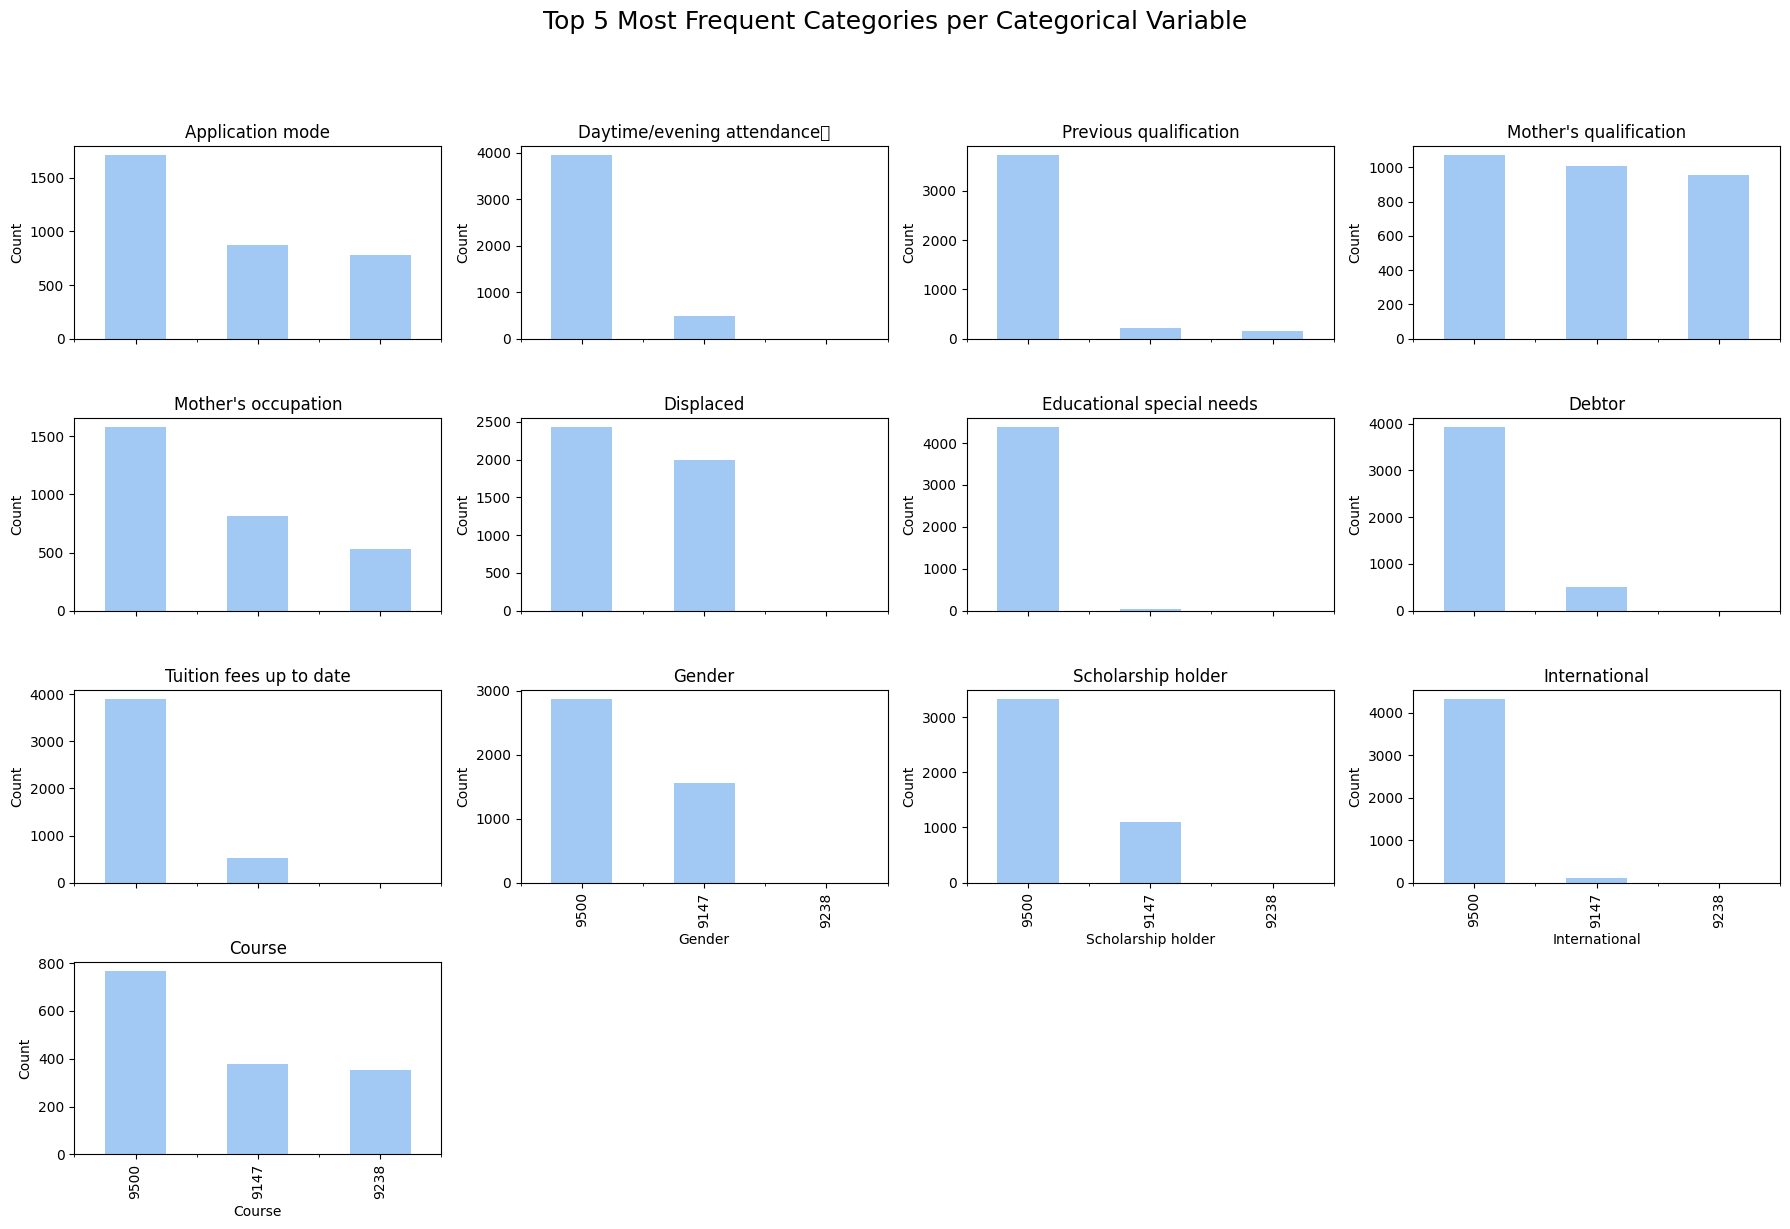

In [64]:

categorical_data.apply(pd.Series.value_counts).plot(kind='bar', subplots=True, layout=(4,4), figsize=(18,12), legend=False)
plt.tight_layout()
plt.suptitle('Top 5 Most Frequent Categories per Categorical Variable', fontsize=18, y=1.02)
for ax, col in zip(plt.gcf().axes, categorical_data.columns):
    counts = categorical_data[col].value_counts().head(3)
    ax.clear()
    counts.plot(kind='bar', ax=ax)
    ax.set_title(col)
    ax.set_ylabel('Count')
plt.tight_layout(rect=[0, 0, 1, 0.97])


### 2.2. Further variable analysis


#### 2.2.1. Economic variables

Interpreting Economic Indicators:

* **Unemployment Rate:**
Reflects the percentage of the labor force that is unemployed at the time of the student's enrollment. A higher unemployment rate might influence a student's decision to pursue higher education or affect their financial stability. 
* **Inflation Rate:** 
Indicates the rate at which the general level of prices for goods and services is rising. High inflation can impact the cost of living and educational expenses. 
* **GDP (Gross Domestic Product):**
 Represents the economic performance of the country. A higher GDP may correlate with better funding for educational institutions and more opportunities for students.

In [11]:
economic_var = data[['Unemployment rate','Inflation rate','GDP']]
print(economic_var.head())

# Count number of different combinations and how often they occur
comb_counts = economic_var.value_counts().reset_index(name='count')
comb_counts

   Unemployment rate  Inflation rate   GDP
0               10.8             1.4  1.74
1               13.9            -0.3  0.79
2               10.8             1.4  1.74
3                9.4            -0.8 -3.12
4               13.9            -0.3  0.79


,Unemployment rate,Inflation rate,GDP,count
0,7.6,2.6,0.32,571
1,9.4,-0.8,-3.12,533
2,10.8,1.4,1.74,525
3,12.4,0.5,1.79,445
4,12.7,3.7,-1.70,419
5,11.1,0.6,2.02,414
6,15.5,2.8,-4.06,397
7,13.9,-0.3,0.79,390
8,8.9,1.4,3.51,368
9,16.2,0.3,-0.92,362


#### 2.2.2. Nationality and International

FOR THIS ONE WE CAN CREATE BARPLOTS TO SHOW THE COUNTS FOR THIS VARIABLES

In [12]:
print(len(data.value_counts("Nacionality")))
# Group Nacionality into 'largest' and 'other'
largest_nacionality = data['Nacionality'].value_counts().idxmax()
grouped = data['Nacionality'].apply(lambda x: 'portuguese' if x == largest_nacionality else 'other')
data.value_counts(grouped)

21


Nacionality
portuguese    4314
other          110
Name: count, dtype: int64

In [13]:
data.value_counts("International")

International
0    4314
1     110
Name: count, dtype: int64

#### 2.2.3. Qualifications

In [14]:
# Create a DataFrame with value counts for the three columns
mothers_qual = data["Mother's qualification"].value_counts()
fathers_qual = data["Father's qualification"].value_counts()
prev_qual = data["Previous qualification"].value_counts()
mothers_qual.index.name = 'ID'
fathers_qual.index.name = 'ID'
prev_qual.index.name = 'ID'

qual_table = pd.DataFrame({
    "Mother's qualification": mothers_qual,
    "Father's qualification": fathers_qual,
    "Previous qualification": prev_qual,
}).fillna(0).astype(int)

qual_table

qual_table.sort_values(by="Mother's qualification", ascending=False, inplace=True)
qual_table

,Mother's qualification,Father's qualification,Previous qualification
ID,,,
1,1069,904,3717
37,1009,1209,0
19,953,968,162
38,562,702,7
3,438,282,126
34,130,112,0
2,83,68,23
4,49,39,8
12,42,38,45


#### 2.2.4. Occupation

In [15]:
data.value_counts("Mother's occupation")

Mother's occupation
9      1577
4       817
5       530
3       351
2       318
7       272
0       144
1       102
6        91
90       70
8        36
191      26
99       17
194      11
141       8
123       7
144       6
192       5
175       5
10        4
134       4
193       4
132       3
151       3
143       3
122       2
153       2
152       2
125       1
131       1
173       1
171       1
Name: count, dtype: int64

#### 2.2.5. Course

In [16]:
data["Course"].value_counts()

Course
9500    766
9147    380
9238    355
9085    337
9773    331
9670    268
9991    268
9254    252
9070    226
171     215
8014    215
9003    210
9853    192
9119    170
9130    141
9556     86
33       12
Name: count, dtype: int64

### 2.3. Target Variable

#### 2.3.1 Target Variable Exploration

We chose to focus on predicting student dropout because it represents a negative outcome that institutions actively seek to prevent. Early identification of at-risk students allows for timely intervention and support, making this prediction task highly valuable for policy and practice.

The dataset includes relevant academic and demographic features that can inform dropout risk. The labeled 'dropout' class makes it feasible to train reliable machine learning classification models.

The target variable in this data set is named: 'Target' and have three labels: Graduate, Dropout and Enroll. 


In [17]:
#Check for class balance
n_graduate, n_dropout, n_enrolled = data.value_counts('Target')

In [18]:
n = n_graduate + n_dropout + n_enrolled
proportion_g = n_graduate/n
proportion_d = n_dropout/n
proportion_e = n_enrolled/n
print(proportion_g, proportion_d, proportion_e)

0.4993218806509946 0.3212025316455696 0.1794755877034358


We observe the following pattern of our target label: <br>
Graduate: 2209 (0.49) <br>
Dropout: 1421 (0.32)<br>
Enrolled: 794 (0.17)<br>
First number is occurence, second is frequency
There is a class imbalance.

C:\Users\crist\AppData\Local\Temp\ipykernel_12784\503346687.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Target', data=data, palette='rocket')


<Axes: xlabel='Target', ylabel='count'>

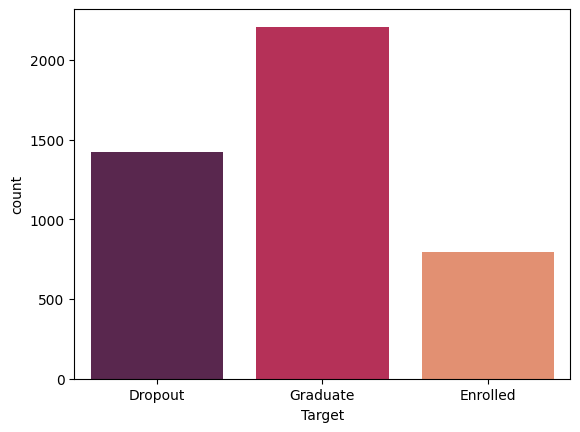

In [19]:
sns.set_palette("pastel")
#sns.histplot(data = data, x = "Target" )
sns.countplot(x='Target', data=data, palette='rocket')


In [20]:
#create new data frame without Target variable
data_without_target = data.drop(['Target'], axis = 1) 

array([[<Axes: title={'center': 'Marital status'}>,
        <Axes: title={'center': 'Application mode'}>,
        <Axes: title={'center': 'Application order'}>,
        <Axes: title={'center': 'Course'}>,
        <Axes: title={'center': 'Daytime/evening attendance\t'}>],
       [<Axes: title={'center': 'Previous qualification'}>,
        <Axes: title={'center': 'Previous qualification (grade)'}>,
        <Axes: title={'center': 'Nacionality'}>,
        <Axes: title={'center': "Mother's qualification"}>,
        <Axes: title={'center': "Father's qualification"}>],
       [<Axes: title={'center': "Mother's occupation"}>,
        <Axes: title={'center': "Father's occupation"}>,
        <Axes: title={'center': 'Admission grade'}>,
        <Axes: title={'center': 'Displaced'}>,
        <Axes: title={'center': 'Educational special needs'}>],
       [<Axes: title={'center': 'Debtor'}>,
        <Axes: title={'center': 'Tuition fees up to date'}>,
        <Axes: title={'center': 'Gender'}>,
   

c:\Users\crist\OneDrive\Documentos\Documents\AISS master program\II_Sem_Porto\ML\.venv\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
c:\Users\crist\OneDrive\Documentos\Documents\AISS master program\II_Sem_Porto\ML\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


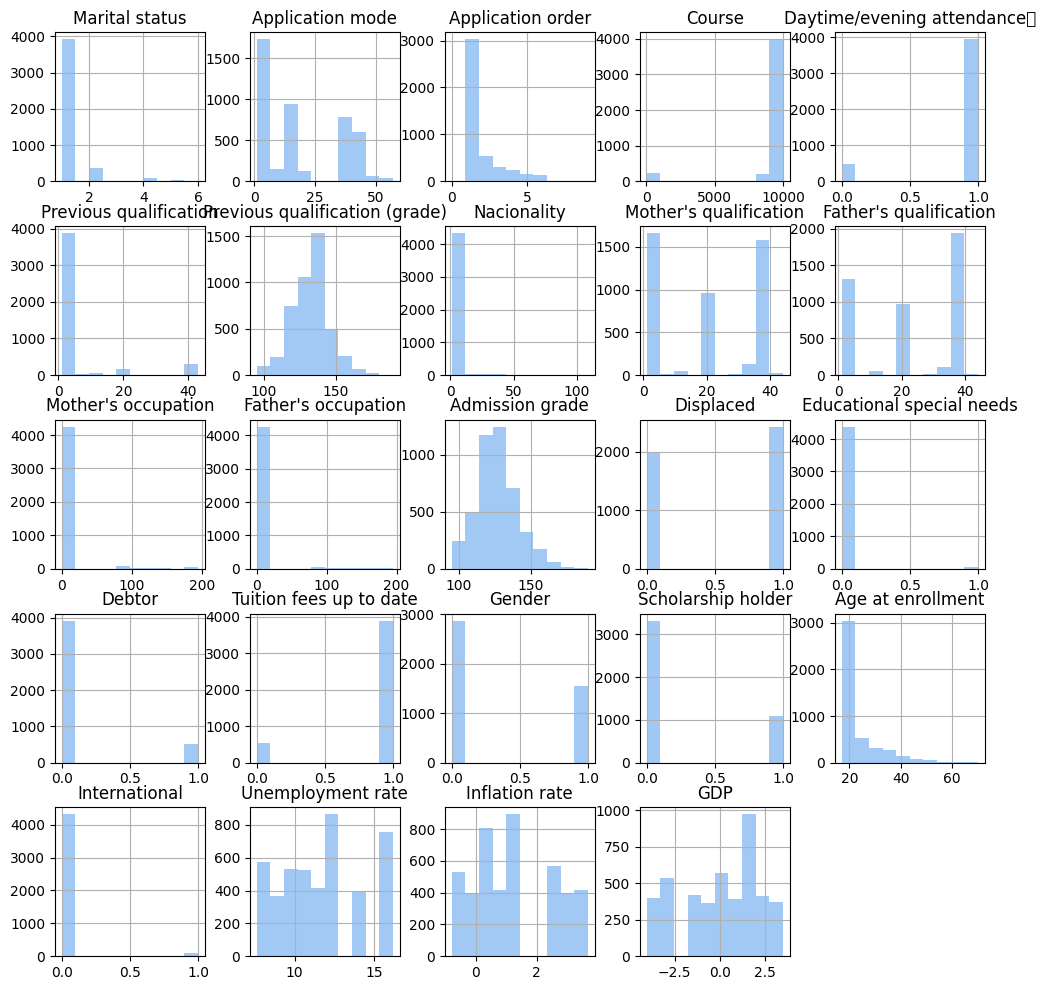

In [21]:
# Exclude columns that contain "Curricular" in their header
no_curricular_data = data_without_target.loc[:, ~data_without_target.columns.str.contains("Curricular", case=False)]


no_curricular_data.hist(figsize=(12,12))

#### 2.3.2 Target Variable Encoding

In [ ]:
#Translate Target to 0 or 1 for SVM 
data = data.replace("Dropout", 1)
data = data.replace("Graduate", 0)

Justification: Grid search needs ones and zeroes, evaluation matrix will also need this

### 2.4 Correlation between columns

In [22]:

#Make a correlation matrix
corr = data_without_target.corr()
corr.style.background_gradient(cmap='coolwarm')

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,Mother's occupation,Father's occupation,Admission grade,Displaced,Educational special needs,Debtor,Tuition fees up to date,Gender,Scholarship holder,Age at enrollment,International,Curricular units 1st sem (credited),Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
Marital status,1.000000,0.264006,-0.125854,0.046365,-0.274939,0.062529,-0.022406,-0.008843,0.193163,0.130353,0.034994,0.031609,-0.004771,-0.234886,-0.028343,0.034304,-0.087158,-0.014738,-0.053765,0.522717,-0.027905,0.061209,0.052107,0.058030,-0.031027,-0.059811,0.034711,0.062831,0.039026,0.022784,-0.043739,-0.071506,0.020426,-0.020338,0.008761,-0.027003
Application mode,0.264006,1.000000,-0.286357,0.065385,-0.304092,0.422411,-0.039020,-0.000661,0.118974,0.083276,0.051600,0.036707,-0.013271,-0.301197,-0.030779,0.122818,-0.136262,0.160130,-0.163117,0.516243,0.003438,0.247426,0.164299,0.225938,-0.029055,-0.117741,0.045828,0.238445,0.130046,0.167872,-0.071526,-0.115424,0.047983,0.089080,-0.016375,-0.022743
Application order,-0.125854,-0.286357,1.000000,0.059507,0.158657,-0.184315,-0.064484,-0.022416,-0.064956,-0.050288,-0.039039,-0.030014,-0.096930,0.332362,0.025597,-0.072151,0.055891,-0.089559,0.073709,-0.271154,-0.028801,-0.133354,-0.016808,-0.092156,0.035580,0.058308,-0.031699,-0.125815,0.028878,-0.055089,0.071793,0.055517,-0.015757,-0.098419,-0.011133,0.030201
Course,0.046365,0.065385,0.059507,1.000000,-0.043151,0.006654,-0.081013,-0.033923,0.054543,0.050724,0.031265,0.028881,-0.125058,-0.087399,-0.018795,-0.032673,0.018381,-0.099571,0.017138,0.042994,-0.026737,-0.096335,0.328461,0.272845,0.180500,0.389349,0.034514,-0.089817,0.401539,0.278797,0.198032,0.348728,0.030816,0.007153,0.017710,-0.020265
Daytime/evening attendance,-0.274939,-0.304092,0.158657,-0.043151,1.000000,-0.071871,0.052597,0.018530,-0.204767,-0.139894,-0.019067,-0.015477,0.007970,0.251767,0.031017,0.006658,0.038799,-0.012326,0.093912,-0.462280,0.027973,-0.127466,-0.043056,-0.045889,0.016935,0.063974,0.045630,-0.111953,0.000371,0.014610,0.034022,0.050493,-0.004229,0.061974,-0.024043,0.022929
Previous qualification,0.062529,0.422411,-0.184315,0.006654,-0.071871,1.000000,0.104072,-0.029214,-0.013190,-0.006614,0.014822,0.016263,0.184183,-0.115188,-0.010461,0.095104,-0.068453,0.078684,-0.070513,0.156234,-0.026226,0.166025,0.078702,0.130597,0.022020,-0.000497,0.002887,0.143031,0.056179,0.114850,-0.008632,0.000942,0.005102,0.111958,-0.063736,0.064069
Previous qualification (grade),-0.022406,-0.039020,-0.064484,-0.081013,0.052597,0.104072,1.000000,0.054088,-0.060670,-0.035234,-0.011415,-0.019284,0.580444,-0.011001,-0.001458,-0.037507,0.060578,-0.047874,0.055965,-0.111377,0.048529,-0.008872,-0.029169,-0.070702,0.048410,0.059438,-0.003926,-0.018489,-0.031649,-0.061355,0.050263,0.053239,-0.019015,0.045222,0.018710,-0.052620
Nacionality,-0.008843,-0.000661,-0.022416,-0.033923,0.018530,-0.029214,0.054088,1.000000,-0.049946,-0.085282,0.043187,0.020626,0.028176,-0.007448,-0.005982,0.051989,-0.026115,-0.023258,-0.010490,-0.003647,0.790935,-0.000370,-0.013292,-0.007763,-0.002268,0.000869,0.009145,-0.007278,-0.020113,-0.025721,-0.017880,-0.008497,-0.014041,-0.000651,-0.008922,0.034478
Mother's qualification,0.193163,0.118974,-0.064956,0.054543,-0.204767,-0.013190,-0.060670,-0.049946,1.000000,0.535140,0.076772,0.052329,-0.054412,-0.081176,-0.021534,0.018774,-0.025665,-0.058753,0.045951,0.294614,-0.038504,0.046855,0.053664,0.045

We can see that there is a very big correlation between credits in the first and second semester (graded, evaluated and approved). <br>
We should maybe combine them into one or two categories (credits 1. sem, credits 2. sem)<br>
There is a very large correlation between nationality and International which makes sense and we should probably remove one of them.<br>
There is a large correlation between age and marital status + application mode<br>

In [23]:
#create data for curricular columns
curricular_data = data_without_target.filter(like ="Curricular", axis=1)

#Make a correlation matrix
corr = curricular_data.corr()
corr.style.background_gradient(cmap='coolwarm')

,Curricular units 1st sem (credited),Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations)
Curricular units 1st sem (credited),1.000000,0.774344,0.542919,0.628394,0.122978,0.116262,0.944811,0.644826,0.427845,0.490478,0.132971,0.055256
Curricular units 1st sem (enrolled),0.774344,1.000000,0.680220,0.769083,0.376996,0.129337,0.753747,0.942627,0.599567,0.673341,0.361959,0.069547
Curricular units 1st sem (evaluations),0.542919,0.680220,1.000000,0.522396,0.418038,0.241800,0.522187,0.611842,0.778863,0.442265,0.355036,0.134296
Curricular units 1st sem (approved),0.628394,0.769083,0.522396,1.000000,0.696113,-0.013360,0.607661,0.733772,0.539934,0.904002,0.685560,-0.053983
Curricular units 1st sem (grade),0.122978,0.376996,0.418038,0.696113,1.000000,-0.071660,0.113937,0.406167,0.487236,0.673335,0.837170,-0.066076
Curricular units 1st sem (without evaluations),0.116262,0.129337,0.241800,-0.013360,-0.071660,1.000000,0.117359,0.109924,0.144683,-0.013070,-0.061482,0.583261
Curricular units 2nd sem (credited),0.944811,0.753747,0.522187,0.607661,0.113937,0.117359,1.000000,0.676258,0.430978,0.519081,0.129770,0.070148
Curricular units 2nd sem (enrolled),0.644826,0.942627,0.611842,0.733772,0.406167,0.109924,0.676258,1.000000,0.604821,0.703258,0.395135,0.067697
Curricular units 2nd sem (evaluations),0.427845,0.599567,0.778863,0.539934,0.487236,0.144683,0.430978,0.604821,1.000000,0.463535,0.453394,0.144877
Curricular units 2nd sem (approved),0.490478,0.673341,0.442265,0.904002,0.673335,-0.013070,0.519081,0.703258,0.463535,1.000000,0.760804,-0.061567


In [24]:
##Create correlation table with values and not a plot
correlation_matrix = data_without_target.corr()
# Remove self-correlation (set diagonal values to NaN)
np.fill_diagonal(correlation_matrix.values, np.nan)
#treshold to filter the confusion matrix with the correlations that are higher to this value
threshold = 0.5
# Find correlated pairs (without taking absolute values)
high_corr_pairs = correlation_matrix.stack().reset_index() #transform to a DF
high_corr_pairs.columns = ['Feature_1', 'Feature_2', 'Correlation']
# Filter to keep both high positive and high negative correlations
filtered_corr = high_corr_pairs[
    (high_corr_pairs['Correlation'] > threshold) | (high_corr_pairs['Correlation'] < -threshold)
].sort_values(by="Correlation", ascending=False)

# Display the results
filtered_corr[::2]

,Feature_1,Feature_2,Correlation
966,Curricular units 2nd sem (credited),Curricular units 1st sem (credited),0.944811
797,Curricular units 1st sem (enrolled),Curricular units 2nd sem (enrolled),0.942627
395,Father's occupation,Mother's occupation,0.910472
869,Curricular units 1st sem (approved),Curricular units 2nd sem (approved),0.904002
905,Curricular units 1st sem (grade),Curricular units 2nd sem (grade),0.837170
707,International,Nacionality,0.790935
833,Curricular units 1st sem (evaluations),Curricular units 2nd sem (evaluations),0.778863
756,Curricular units 1st sem (credited),Curricular units 1st sem (enrolled),0.774344
793,Curricular units 1st sem (enrolled),Curricular units 1st sem (approved),0.769083
1115,Curricular units 2nd sem (grade),Curricular units 2nd sem (approved),0.760804


We saw there is a high correlation between the curricular columns. 

Based on this table we can see the variables that are correlated and that we can decide to either remove one of those or merge them like the curricular columns.



### 2.5. Conclusion

1. Resolve Economic Situation (GPD, Inflation Rate, Unenmployment Rate)
2. Resolve International + Nationality
3. Maritial Status + Age of enrollment, Age of enrollment + application mode
4. Resolve Curricular units
5. Resolve Mothers + Fathers occupation
6. Replace numbers that encode something by string for what they encode
7. undo encoding

## 3. Model Before Feature Engineering

In [25]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split    
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes  import GaussianNB


We decided to perform machine learning on our dataset before we do the feature engineering.
This is to have a baseline of how well the set of machine learning algorithms performs on the dataset without any preprocessing.
Doing this enables us to test how much, if at all, the algorithms improve after feature engineering.
We are testing a wide range of algorithms and for the ones that are most promising we will perform further hyper parameter testing later on.

The algorithms we picked are:
1. Support Vector Machine classifier
2. K Nearest Neighbours
3. Logistic Regression
4. Decission Trees
5. Naive Bayes Classifier

Those were picked because they are interpretable to some extent (maybe we need to add sources?) are widley used. They are also rather simple models, compared to something more complex like convlutional neural networks.

In the pipeline, first the target variable will be extracted from the dataframe as X (target) and y (feature space) is the dataframe without the target variable.
Functions will be defined that run a model and return the predictions. This means we can simply reuse those functions later on. 

KNN classifies each entity in correspondance to the mayority of its neighbours (k neighbours)
Support Vector Machine fits a classification line through the feature space ?
Decission trees defines a set of questions/instructions/property that are checked in a specific order
Naive Bayes Classifier makes use of Naives Bayes assumption to calculate a probability of an entity beloging to class X, given a set of features : P(Class| Features )
Logistic Regression - Have to look this up

In [26]:
#We will drop people with target value == Enrolled
enrolled = data[data["Target"] == "Enrolled"].index
data.drop(enrolled,inplace=True)
data["Target"].value_counts()

Target
Graduate    2209
Dropout     1421
Name: count, dtype: int64

In [27]:
data_before_engineering = data

#Define X and y 
y = data_before_engineering["Target"]
X = data_before_engineering.drop(['Target'], axis = 1) 

# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=43)

### 3.1. SVM

In [28]:
def train_and_predict_SVM(X_train, y_train, x_test):
    #Initilize a SVM
    clf = SVC(random_state=43)
    #Fit it to the training data
    clf.fit(X_train,y_train) 
    #Predicate on the testdata
    y_pred = clf.predict(x_test)
    return(y_pred)

In [29]:
y_pred_svm = train_and_predict_SVM(X_train, y_train, X_test)
acc_svm_before = accuracy_score(y_test, y_pred_svm)
print(acc_svm_before)
confusion_matrix(y_test, y_pred_svm)

0.6497797356828194


array([[  0, 318],
       [  0, 590]])

### 3.2. KNN

In [30]:
def train_and_predict_KNN(X_train, y_train, x_test, n):
    #Initilize a KNN
    knn = KNeighborsClassifier(n_neighbors=n)
    #Fit it to the training data
    knn.fit(X_train,y_train) 
    #Predicate on the testdata
    y_pred = knn.predict(x_test)
    #Check Accuracy
    return(y_pred)

In [31]:
n = 3
y_pred_knn= train_and_predict_KNN(X_train, y_train, X_test, n)
acc_knn_before = accuracy_score(y_test, y_pred_knn)
print(acc_knn_before)
confusion_matrix(y_test, y_pred_knn)

0.7533039647577092


array([[188, 130],
       [ 94, 496]])

### 3.3. Logistic Regression

In [32]:
def train_and_predict_LR(X_train, y_train, x_test):
    #Initilize a LR
    clf = LogisticRegression(random_state=43,max_iter = 50)
    #Fit it to the training data
    clf.fit(X_train,y_train) 
    #Predicate on the testdata
    y_pred = clf.predict(x_test)
    return y_pred

In [33]:
y_pred_lr = train_and_predict_LR(X_train, y_train, X_test)
acc_lr_before = accuracy_score(y_test, y_pred_lr)
print(acc_lr_before)
confusion_matrix(y_test, y_pred_lr)

0.8348017621145375


c:\Users\crist\OneDrive\Documentos\Documents\AISS master program\II_Sem_Porto\ML\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array([[207, 111],
       [ 39, 551]])

### 3.4. Decision Trees

In [34]:
from sklearn.tree import DecisionTreeClassifier


def train_and_predict_DTC(X_train, y_train, x_test):

    #Initilize a DTC
    clf = DecisionTreeClassifier(random_state=43)
    #Fit it to the training data
    clf.fit(X_train,y_train)
    #Predicate on the testdata
    y_pred = clf.predict(x_test)
    return y_pred

In [35]:
y_pred_dt = train_and_predict_DTC(X_train, y_train, X_test)
acc_dt_before = accuracy_score(y_test, y_pred_dt)
print(acc_dt_before)
print(confusion_matrix(y_test, y_pred_dt))

0.8370044052863436
[[253  65]
 [ 83 507]]


### 3.5. Naive Bayes

In [36]:
def train_and_predict_GNB(X_train, y_train, X_test):
    #Initilize a SVM
    gnb = GaussianNB()
    #Fit it to the training data
    gnb.fit(X_train,y_train)
    #Predicate on the testdata
    y_pred = gnb.predict(X_test)
    #Check Accuracy
    accuracy = accuracy_score(y_pred, y_test)
    return y_pred

In [37]:
y_pred_gnb = train_and_predict_GNB(X_train, y_train, X_test)
acc_nb_before = accuracy_score(y_test, y_pred_gnb)
print(acc_nb_before)
print(confusion_matrix(y_test, y_pred_gnb))

0.8348017621145375
[[230  88]
 [ 62 528]]


## 4. Feature Engineering

In the exploratory data analysis we identified changes we want to make to the dataset with the goal to make it more interpretable and make a machine learning model perform better.

The steps are 1. drop columns with high correlations. The columns we decided to drop are:
Previous qualification (grade) - high correlation with admission grade
Marital Status - high correlation with Age at enrollment
Nationality - high correlation with international
Father’s qualification - high correlation with Mother’s qualification
Father’s occupation - high correlation with Mother’s occupation

Step 2: Derive new features based on old features. This is done by taking the average of any given curricular unit column from semester 1 and 2 and calculating the average ((semester 1 + semester 2) / 2. The semester 1 and semester 2 columns are then removed and the average is added to the dataframe as a new feature. This is done for curricular units: credited, enrolled, evaluations, approved, grade, without evaluations.

Step 3: Cardinality reduction of course, mothers qualification and previous qualification. The courses are grouped into areas of study. This reduces the number of classes from 17 to 8. The name of the column is changed to ‘field of study’, because it no longer represents the course. Mothers Qualification and previous qualification have 29 and 17 classes. We decided to group both of them into secondary education, lower than secondary education and higher than secondary education. Both features now only have 3 classes.

Step 4: One hot encoding of mothers qualification and previous qualification. This was done so that the classes would no longer be interpreted by the model as representing an ordinal relationship. We decided to encode them with 3 features for the sake of interpretability, even though adding only 2 would have been able to provide the same information (as when both are wrong that would mean the third one has to be true).


### 4.1. Dropping Columns

ADD JUSTIFICATION ON WHY

We will resolve the previous mentioned high correlations <br>
Since Admission grade and previous qualification(grade) have high correlation -> Remove previous qualification(grade) <br>
Age at enrollment + Appplication mode -> Remove Application Mode <br>
Age at enrollment + Maritial Status -> Remove Maritial Status <br>
Join Curricular Units first and second semester for each category -> maybe further remove approved/enrolled <br>
International + Nationality -> Remove Nationality<br>
Mothers Occupation and Fathers Occupation -> Remove Fathers Occupation<br>
Mothers Education and Fathers Edducation -> Remove Fathers Education<br>



In [38]:
pd.set_option('display.max_columns', None)
data

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,Mother's occupation,Father's occupation,Admission grade,Displaced,Educational special needs,Debtor,Tuition fees up to date,Gender,Scholarship holder,Age at enrollment,International,Curricular units 1st sem (credited),Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,5,9,127.3,1,0,0,1,1,0,20,0,0,0,0,0,0.000000,0,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,3,3,142.5,1,0,0,0,1,0,19,0,0,6,6,6,14.000000,0,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,9,9,124.8,1,0,0,0,1,0,19,0,0,6,0,0,0.000000,0,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,5,3,119.6,1,0,0,1,0,0,20,0,0,6,8,6,13.428571,0,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,9,9,141.5,0,0,0,1,0,0,45,0,0,6,9,5,12.333333,0,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,1,1,6,9773,1,1,125.0,1,1,1,5,4,122.2,0,0,0,1,1,0,19,0,0,6,7,5,13.600000,0,0,6,8,5,12.666667,0,15.5,2.8,-4.06,Graduate
4420,1,1,2,9773,1,1,120.0,105,1,1,9,9,119.0,1,0,1,0,0,0,18,1,0,6,6,6,12.000000,0,0,6,6,2,11.000000,0,11.1,0.6,2.02,Dropout
4421,1,1,1,9500,1,1,154.0,1,37,37,9,9,149.5,1,0,0,1,0,1,30,0,0,7,8,7,14.912500,0,0,8,9,1,13.500000,0,13.9,-0.3,0.79,Dropout
4422,1,1,1,9147,1,1,180.0,1,37,37,7,4,153.8,1,0,0,1,0,1,20,0,0,5,5,5,13.800000,0,0,5,6,5,12.000000,0,9.4,-0.8,-3.12,Graduate


In [39]:
#Here we will remove the previously mentioned columns
data.drop(columns = ["Previous qualification (grade)", "Marital status", "Nacionality", "Father's qualification", "Father's occupation"], inplace = True)

### 4.2. Creation of new columns

In [40]:
#Here we will join the curricular units
#Get the average of the credits columns of 1st sem and 2nd sem

# categories of name:

data['Curricular units year (credited)'] = (data['Curricular units 1st sem (credited)'] + data['Curricular units 2nd sem (credited)'])/2
data['Curricular units year (enrolled)'] = (data['Curricular units 1st sem (enrolled)'] + data['Curricular units 2nd sem (enrolled)'])/2
data['Curricular units year (evaluations)'] = (data['Curricular units 1st sem (evaluations)'] + data['Curricular units 2nd sem (evaluations)'])/2
data['Curricular units year (approved)'] = (data['Curricular units 1st sem (approved)'] + data['Curricular units 2nd sem (approved)'])/2
data['Curricular units year (grade)'] = (data['Curricular units 1st sem (grade)'] + data['Curricular units 2nd sem (grade)'])/2
data['Curricular units year (without evaluations)'] = (data['Curricular units 1st sem (without evaluations)'] + data['Curricular units 2nd sem (without evaluations)'])/2

data.drop(columns = ['Curricular units 1st sem (credited)','Curricular units 2nd sem (credited)','Curricular units 1st sem (enrolled)','Curricular units 2nd sem (enrolled)','Curricular units 1st sem (evaluations)','Curricular units 2nd sem (evaluations)',
                 'Curricular units 1st sem (approved)','Curricular units 2nd sem (approved)','Curricular units 1st sem (grade)','Curricular units 2nd sem (grade)','Curricular units 1st sem (without evaluations)','Curricular units 2nd sem (without evaluations)'], inplace = True)

### 4.3. Cardinality Reduction

#### 4.3.1 Mothers Qualification

In [41]:
# data["Mother's qualification"] = data["Mother's qualification"].replace({
#     1: 'Secondary Education - 12th Year of Schooling or Eq.',
#     2: "Higher Education - Bachelor's Degree",
#     3: 'Higher Education - Degree',
#     4: "Higher Education - Master's",
#     5: 'Higher Education - Doctorate',
#     6: 'Frequency of Higher Education',
#     9: '12th Year of Schooling - Not Completed',
#     10: '11th Year of Schooling - Not Completed',
#     11: '7th Year (Old)',
#     12: 'Other - 11th Year of Schooling',
#     14: '10th Year of Schooling',
#     18: 'General commerce course',
#     19: 'Basic Education 3rd Cycle (9th/10th/11th Year) or Equiv.',
#     22: 'Technical-professional course',
#     26: '7th year of schooling',
#     27: '2nd cycle of the general high school course',
#     29: '9th Year of Schooling - Not Completed',
#     30: '8th year of schooling',
#     34: 'Unknown',
#     35: "Can't read or write",
#     36: 'Can read without having a 4th year of schooling',
#     37: 'Basic education 1st cycle (4th/5th year) or equiv.',
#     38: 'Basic Education 2nd Cycle (6th/7th/8th Year) or Equiv.',
#     39: 'Technological specialization course',
#     40: 'Higher education - degree (1st cycle)',
#     41: 'Specialized higher studies course',
#     42: 'Professional higher technical course',
#     43: 'Higher Education - Master (2nd cycle)',
#     44: 'Higher Education - Doctorate (3rd cycle)'


data["Mother's qualification"] = data["Mother's qualification"].replace({
    1: 'M. secondary education',
    2:'M. higher than secondary education',
    3:'M. higher than secondary education',
    4:'M. higher than secondary education',
    5:'M. higher than secondary education',
    6:'M. lower than secondary education',
    9: 'M. lower than secondary education',
    10: 'M. lower than secondary education',
    11: 'M. lower than secondary education',
    12: 'M. lower than secondary education',
    14: 'M. lower than secondary education',
    18: 'M. higher than secondary education',
    19: 'M. lower than secondary education',
    22: 'M. higher than secondary education',
    26: 'M. lower than secondary education',
    27: 'M. lower than secondary education',
    29: 'M. lower than secondary education',
    30: 'M. lower than secondary education',
    34: 'M. lower than secondary education',
    35: 'M. lower than secondary education',
    36: 'M. lower than secondary education',
    37: 'M. lower than secondary education',
    38: 'M. lower than secondary education',
    39: 'M. higher than secondary education',
    40: 'M. higher than secondary education',
    41: 'M. higher than secondary education',
    42: 'M. higher than secondary education',
    43: 'M. higher than secondary education',
    44: 'M. higher than secondary education'
})

data["Mother's qualification"].value_counts()

Mother's qualification
M. lower than secondary education     2288
M. secondary education                 865
M. higher than secondary education     477
Name: count, dtype: int64

#### 4.3.2 Previous Qualification

In [42]:

# 1 - Secondary education
# 2 - Higher education - bachelor's degree
# 3 - Higher education - degree
# 4 - Higher education - master's
# 5 - Higher education - doctorate
# 6 - Frequency of higher education
# 9 - 12th year of schooling - not completed
# 10 - 11th year of schooling - not completed
# 12 - Other - 11th year of schooling
# 14 - 10th year of schooling
# 15 - 10th year of schooling - not completed
# 19 - Basic education 3rd cycle (9th/10th/11th year) or equiv.
# 38 - Basic education 2nd cycle (6th/7th/8th year) or equiv.
# 39 - Technological specialization course
# 40 - Higher education - degree (1st cycle)
# 42 - Professional higher technical course
# 43 - Higher education - master (2nd cycle)


data["Previous qualification"] = data["Previous qualification"].replace({
    1: 'S. secondary education',
    2: 'S. higher than secondary education',
    3: 'S. higher than secondary education',
    4: 'S. higher than secondary education',
    5: 'S. higher than secondary education',
    6: 'S. lower than secondary education',
    9: 'S. lower than secondary education',
    10: 'S. lower than secondary education',
    12: 'S. lower than secondary education',
    14: 'S. lower than secondary education',
    15: 'S. lower than secondary education',
    19: 'S. lower than secondary education',
    38: 'S. lower than secondary education',
    39: 'S. higher than secondary education',
    40: 'S. higher than secondary education',
    42: 'S. higher than secondary education',
    43: 'S. higher than secondary education'
})


data["Previous qualification"].value_counts()


Previous qualification
S. secondary education                3019
S. higher than secondary education     384
S. lower than secondary education      227
Name: count, dtype: int64

#### 4.3.3 Course

In [43]:
#Group Them
data["Course"] = data["Course"].replace({
    33: 'Engineering and Technology', # Biofuel Production Technologies
    171: 'Design and Media', # Animation and Multimedia Desig
    8014: 'Social Sciences', # Social Service (evening attendance)
    9003: 'Agriculture and Environment',# Agronomy
    9070: 'Design and Media',# Communication Design 
    9085: 'Health Sciences',# Veterinary Nursing 
    9119: 'Engineering and Technology',# Informatics Engineering 
    9130: 'Agriculture and Environment',# Equinculture 
    9147: 'Business and Management',# Management
    9238: 'Social Sciences',#  Social Service
    9254: 'Tourism and Hospitality',# Tourism
    9500: 'Health Sciences',# Nursing
    9556: 'Health Sciences',# Oral Hygiene
    9670: 'Business and Management',# Advertising and Marketing Management
    9773: 'Design and Media',# Journalism and Communication
    9853: 'Education',# Basic Education
    9991: 'Business and Management' # Management (evening attendance)
})
data["Course"].value_counts()

#Encode them again
data["Course"] = data["Course"].replace({
    'Health Sciences': 0,
    'Business and Management': 1,
    'Design and Media': 2,
    'Social Sciences': 3,
    'Agriculture and Environment': 4,
    'Tourism and Hospitality': 5,
    'Education': 6,
    'Engineering and Technology': 7
})

data["Course"].value_counts()

##rename course to Area of Study
data.rename(columns = {'Course':'Area of Study'}, inplace = True)

C:\Users\crist\AppData\Local\Temp\ipykernel_12784\3302436986.py:24: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data["Course"] = data["Course"].replace({


### 4.4. One Hot Encoding

Here we will one hot encode the both qualification columns

In [44]:
data

,Application mode,Application order,Area of Study,Daytime/evening attendance\t,Previous qualification,Mother's qualification,Mother's occupation,Admission grade,Displaced,Educational special needs,Debtor,Tuition fees up to date,Gender,Scholarship holder,Age at enrollment,International,Unemployment rate,Inflation rate,GDP,Target,Curricular units year (credited),Curricular units year (enrolled),Curricular units year (evaluations),Curricular units year (approved),Curricular units year (grade),Curricular units year (without evaluations)
0,17,5,2,1,S. secondary education,M. lower than secondary education,5,127.3,1,0,0,1,1,0,20,0,10.8,1.4,1.74,Dropout,0.0,0.0,0.0,0.0,0.000000,0.0
1,15,1,5,1,S. secondary education,M. secondary education,3,142.5,1,0,0,0,1,0,19,0,13.9,-0.3,0.79,Graduate,0.0,6.0,6.0,6.0,13.833333,0.0
2,1,5,2,1,S. secondary education,M. lower than secondary education,9,124.8,1,0,0,0,1,0,19,0,10.8,1.4,1.74,Dropout,0.0,6.0,0.0,0.0,0.000000,0.0
3,17,2,2,1,S. secondary education,M. lower than secondary education,5,119.6,1,0,0,1,0,0,20,0,9.4,-0.8,-3.12,Graduate,0.0,6.0,9.0,5.5,12.914286,0.0
4,39,1,3,0,S. secondary education,M. lower than secondary education,9,141.5,0,0,0,1,0,0,45,0,13.9,-0.3,0.79,Graduate,0.0,6.0,7.5,5.5,12.666667,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,1,6,2,1,S. secondary education,M. secondary education,5,122.2,0,0,0,1,1,0,19,0,15.5,2.8,-4.06,Graduate,0.0,6.0,7.5,5.0,13.133333,0.0
4420,1,2,2,1,S. secondary education,M. secondary education,9,119.0,1,0,1,0,0,0,18,1,11.1,0.6,2.02,Dropout,0.0,6.0,6.0,4.0,11.500000,0.0
4421,1,1,0,1,S. secondary education,M. lower than secondary education,9,149.5,1,0,0,1,0,1,30,0,13.9,-0.3,0.79,Dropout,0.0,7.5,8.5,4.0,14.206250,0.0
4422,1,1,1,1,S. secondary education,M. lower than secondary education,7,153.8,1,0,0,1,0,1,20,0,9.4,-0.8,-3.12,Graduate,0.0,5.0,5.5,5.0,12.900000,0.0


In [45]:
data_backup_before_one_hot_encoding= data
data = pd.get_dummies(data, columns=["Mother's qualification"]) # ,drop_first=True) # check if we need to do the drop or not to avoid multicollinearity
data = pd.get_dummies(data, columns=["Previous qualification"]) # ,drop_first=True) # check if we need to do the drop or not to avoid multicollinearity
data

,Application mode,Application order,Area of Study,Daytime/evening attendance\t,Mother's occupation,Admission grade,Displaced,Educational special needs,Debtor,Tuition fees up to date,Gender,Scholarship holder,Age at enrollment,International,Unemployment rate,Inflation rate,GDP,Target,Curricular units year (credited),Curricular units year (enrolled),Curricular units year (evaluations),Curricular units year (approved),Curricular units year (grade),Curricular units year (without evaluations),Mother's qualification_M. higher than secondary education,Mother's qualification_M. lower than secondary education,Mother's qualification_M. secondary education,Previous qualification_S. higher than secondary education,Previous qualification_S. lower than secondary education,Previous qualification_S. secondary education
0,17,5,2,1,5,127.3,1,0,0,1,1,0,20,0,10.8,1.4,1.74,Dropout,0.0,0.0,0.0,0.0,0.000000,0.0,False,True,False,False,False,True
1,15,1,5,1,3,142.5,1,0,0,0,1,0,19,0,13.9,-0.3,0.79,Graduate,0.0,6.0,6.0,6.0,13.833333,0.0,False,False,True,False,False,True
2,1,5,2,1,9,124.8,1,0,0,0,1,0,19,0,10.8,1.4,1.74,Dropout,0.0,6.0,0.0,0.0,0.000000,0.0,False,True,False,False,False,True
3,17,2,2,1,5,119.6,1,0,0,1,0,0,20,0,9.4,-0.8,-3.12,Graduate,0.0,6.0,9.0,5.5,12.914286,0.0,False,True,False,False,False,True
4,39,1,3,0,9,141.5,0,0,0,1,0,0,45,0,13.9,-0.3,0.79,Graduate,0.0,6.0,7.5,5.5,12.666667,0.0,False,True,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,1,6,2,1,5,122.2,0,0,0,1,1,0,19,0,15.5,2.8,-4.06,Graduate,0.0,6.0,7.5,5.0,13.133333,0.0,False,False,True,False,False,True
4420,1,2,2,1,9,119.0,1,0,1,0,0,0,18,1,11.1,0.6,2.02,Dropout,0.0,6.0,6.0,4.0,11.500000,0.0,False,False,True,False,False,True
4421,1,1,0,1,9,149.5,1,0,0,1,0,1,30,0,13.9,-0.3,0.79,Dropout,0.0,7.5,8.5,4.0,14.206250,0.0,False,True,False,False,False,True
4422,1,1,1,1,7,153.8,1,0,0,1,0,1,20,0,9.4,-0.8,-3.12,Graduate,0.0,5.0,5.5,5.0,12.900000,0.0,False,True,False,False,False,True


## 5 Model After Feature Engineering

In [47]:
#Define X and y 
y = data["Target"]
X = data.drop(['Target'], axis = 1) 

# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=43)


### 5.1. SVM

In [48]:
y_pred_svm_af = train_and_predict_SVM(X_train, y_train, X_test)
acc_svm_after = accuracy_score(y_test, y_pred_svm_af)
print(acc_svm_after)
confusion_matrix(y_test, y_pred_svm_af)

0.8281938325991189


array([[564,  26],
       [130, 188]])

#### 5.1.1 SVM Hyperparameter Tuning

In [49]:
# SVM Hyperparameter tuning 
from sklearn.model_selection import GridSearchCV 
from sklearn.metrics import classification_report, confusion_matrix 

  
# defining parameter range 
param_grid = {'C': [0.1, 1, 10, 100, 1000],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['rbf']}  
  
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3) 
  
# fitting the model for grid search 
grid.fit(X_train,y_train)  

# print best parameter after tuning 
print(grid.best_params_) 

# print how our model looks after hyper-parameter tuning 
print(grid.best_estimator_) 

y_pred_svm_tuned = grid.predict(X_test) 

# print classification report 
print(classification_report(y_test, y_pred_svm_tuned))


Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.594 total time=   0.4s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.594 total time=   0.5s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.596 total time=   0.6s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.596 total time=   0.8s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.594 total time=   0.7s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.594 total time=   0.7s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.594 total time=   0.7s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.596 total time=   0.8s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.596 total time=   0.7s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.594 total time=   0.8s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.772 total time=   0.6s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

### 5.2. KNN

In [50]:
n = 3
y_pred_knn_af= train_and_predict_KNN(X_train, y_train, X_test, n)
acc_knn_after = accuracy_score(y_test, y_pred_knn_af)
print(acc_knn_after)
confusion_matrix(y_test, y_pred_knn_af)

0.8116740088105727


array([[533,  57],
       [114, 204]])

#### 5.2.1. Hyperparameter Tuning KNN

0.7236363636363636
Best k: 16
Accuracy with best k: 0.7236363636363636


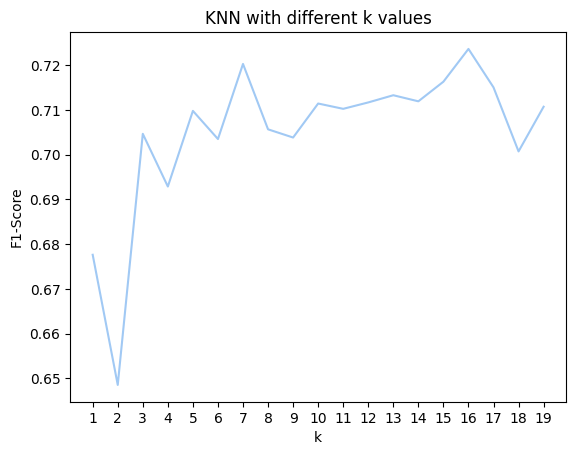

In [51]:
#Hyperparameter Tuning KNN
ks = []
performance = []
#Loop through
for k in range(1, 20):
    y_pred= train_and_predict_KNN(X_train, y_train, X_test, k)
    f1 = f1_score(y_test, y_pred)
    ks.append(k)
    performance.append(f1)
#Plot the results
plt.plot(ks, performance)
plt.xticks(range(1, 20, 1))
plt.xlabel('k')
plt.ylabel('F1-Score')
plt.title('KNN with different k values')

print(max(performance))

#This is a bit redundant but we will do it because the calculation needed is quite minimal. 
# Train and predict using the best k

best_k = ks[performance.index(max(performance))]
y_pred_knn_tuned = train_and_predict_KNN(X_train, y_train, X_test, best_k)

# Print the best k and its accuracy
print(f"Best k: {best_k}")
print(f"Accuracy with best k: {max(performance)}")


### 5.3. Logistic Regression

In [52]:
y_pred_lr_af = train_and_predict_LR(X_train, y_train, X_test)
acc_lr_after = accuracy_score(y_test, y_pred_lr_af)
print(acc_lr_after)
confusion_matrix(y_test, y_pred_lr_af)

0.8821585903083701


c:\Users\crist\OneDrive\Documentos\Documents\AISS master program\II_Sem_Porto\ML\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array([[548,  42],
       [ 65, 253]])

#### 5.3.1 Logistic Regression Hyperparameter Tuning

In [53]:
#Hyperparameter Tuning Logistic Regression
# Define the parameter grid
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],  # Regularization types
    'solver': ['saga', 'liblinear', 'lbfgs']  # Solvers compatible with penalties
}

# Initialize the logistic regression model
lr = LogisticRegression(max_iter=1000, random_state=43)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=lr, param_grid=param_grid, cv=5, scoring='accuracy', verbose=2, n_jobs=-1)

# Fit the model
grid_search.fit(X_train, y_train)

# Print the best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

# Predict using the best model
y_pred_lr_tuned = grid_search.best_estimator_.predict(X_test)

# Evaluate the tuned model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_lr_tuned))
print("Classification Report:")
print(classification_report(y_test, y_pred_lr_tuned))

Fitting 5 folds for each of 60 candidates, totalling 300 fits
Best Parameters: {'C': 1, 'penalty': 'l2', 'solver': 'liblinear'}
Best Score: 0.9140360226659471
Confusion Matrix:
[[567  23]
 [ 55 263]]
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.96      0.94       590
           1       0.92      0.83      0.87       318

    accuracy                           0.91       908
   macro avg       0.92      0.89      0.90       908
weighted avg       0.91      0.91      0.91       908



c:\Users\crist\OneDrive\Documentos\Documents\AISS master program\II_Sem_Porto\ML\.venv\Lib\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
175 fits failed out of a total of 300.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
25 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\crist\OneDrive\Documentos\Documents\AISS master program\II_Sem_Porto\ML\.venv\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\crist\OneDrive\Documentos\Documents\AISS master program\II_Sem_Porto\ML\.venv\Lib\site-packages\sklearn\base.py", line 1389, in wrapper
    return fit_method(estimator

### 5.4. Decision Trees

In [54]:
y_pred_dt_af = train_and_predict_DTC(X_train, y_train, X_test)
acc_dt_after = accuracy_score(y_test, y_pred_dt_af)
print(acc_dt_after)
print(confusion_matrix(y_test, y_pred_dt_af))

0.8579295154185022
[[521  69]
 [ 60 258]]


#### 5.4. Decision Trees Hyperparameter Tuning

In [55]:
#Decission Tree Hyperparameter Tuning
param_grid = {
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
dtree_reg = DecisionTreeClassifier(random_state=43) # Initialize a decision tree regressor
grid_search = GridSearchCV(estimator=dtree_reg, param_grid=param_grid, 
                           cv=5, n_jobs=-1, verbose=2, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)
best_dtree_reg = grid_search.best_estimator_ # Get the best estimator from the grid search
y_pred_DT_tuned = best_dtree_reg.predict(X_test)

best_params = grid_search.best_params_
print(f"Best parameters: {best_params}")



# print classification report 
print(classification_report(y_test, y_pred_DT_tuned)) 
print(accuracy_score(y_test, y_pred_DT_tuned))

Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best parameters: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 2}
              precision    recall  f1-score   support

           0       0.90      0.93      0.91       590
           1       0.85      0.80      0.82       318

    accuracy                           0.88       908
   macro avg       0.87      0.86      0.87       908
weighted avg       0.88      0.88      0.88       908

0.8810572687224669


### 5.5. Naive Bayes

In [56]:
y_pred_nb_af = train_and_predict_GNB(X_train, y_train, X_test)
acc_nb_after = accuracy_score(y_test, y_pred_nb_af)
print(acc_nb_after)
print(confusion_matrix(y_test, y_pred_nb_af))

0.8270925110132159
[[525  65]
 [ 92 226]]


## 6. Evaluation & Interpretation

### 6.1 Evaluation Metric for the Models

In [57]:
def get_model_scores(y_true, y_pred):
    scores = {
        'Accuracy': accuracy_score(y_true, y_pred),
        'Precision': precision_score(y_true, y_pred),
        'Recall': recall_score(y_true, y_pred),
        'F1 Score': f1_score(y_true, y_pred),
    }
    return scores



In [58]:
""" #before feature engineering
for_svm_bfe = y_test, y_pred_svm
#after feature engineering
for_svm_afe = y_test, y_pred_svm_af
#hyperparameter tuning(STANDARIZE)
grid_predictions
 """
#print(get_model_scores(y_test, y_pred_svm)) #where did we change the target to encode 
print(get_model_scores(y_test, y_pred_svm_af))
print(get_model_scores(y_test, y_pred_svm_tuned))	


{'Accuracy': 0.8281938325991189, 'Precision': 0.8785046728971962, 'Recall': 0.5911949685534591, 'F1 Score': 0.706766917293233}
{'Accuracy': 0.9096916299559471, 'Precision': 0.9184397163120568, 'Recall': 0.8144654088050315, 'F1 Score': 0.8633333333333333}


#### 6.1.1 SVM (After feature Engineering)

           Accuracy  Precision    Recall  F1 Score
Score SVM  0.828194   0.878505  0.591195  0.706767


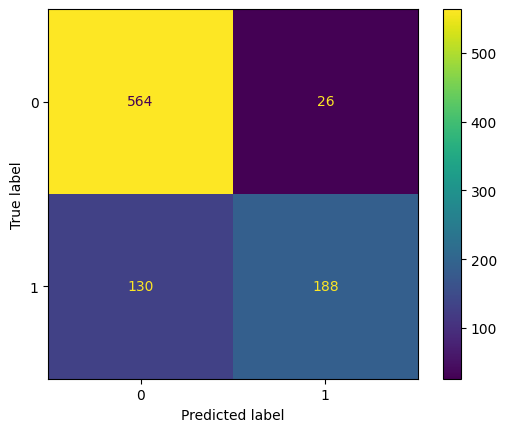

In [59]:
##table of different evaluation metrics
metrics_svm = {
    "Accuracy": accuracy_score(y_test,y_pred_svm_af),
    "Precision": precision_score(y_test, y_pred_svm_af),
    "Recall": recall_score(y_test, y_pred_svm_af),
    "F1 Score": f1_score(y_test, y_pred_svm_af),
    #"ROC AUC": roc_auc_score(X_test, x_pred_svm)
}

metrics_df_svm = pd.DataFrame(metrics_svm, index=["Score SVM"])
print(metrics_df_svm)

#CONSUFION MATRIX 
cm_svm = confusion_matrix(y_test,y_pred_svm_af)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_svm)
disp.plot()


#### 6.1.2 KNN (After feature Engineering)

           Accuracy  Precision    Recall  F1 Score
Score KNN  0.811674   0.781609  0.641509  0.704663


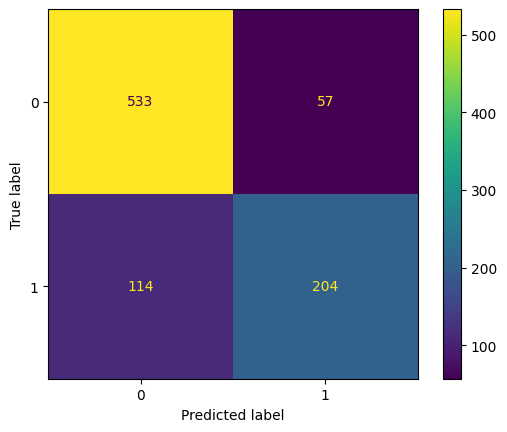

In [60]:
##table of different evaluation metrics
metrics_knn = {
    "Accuracy": accuracy_score(y_test,y_pred_knn_af),
    "Precision": precision_score(y_test, y_pred_knn_af),
    "Recall": recall_score(y_test, y_pred_knn_af),
    "F1 Score": f1_score(y_test, y_pred_knn_af),
    #"ROC AUC": roc_auc_score(X_test, x_pred_svm)
}

metrics_df_svm = pd.DataFrame(metrics_knn, index=["Score KNN"])
print(metrics_df_svm)

#CONSUFION MATRIX 
cm_knn = confusion_matrix(y_test,y_pred_knn_af)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_knn)
disp.plot()

#### 6.1.3 Logistic Regression (After feature Engineering)

          Accuracy  Precision    Recall  F1 Score
Score LR  0.882159   0.857627  0.795597  0.825449


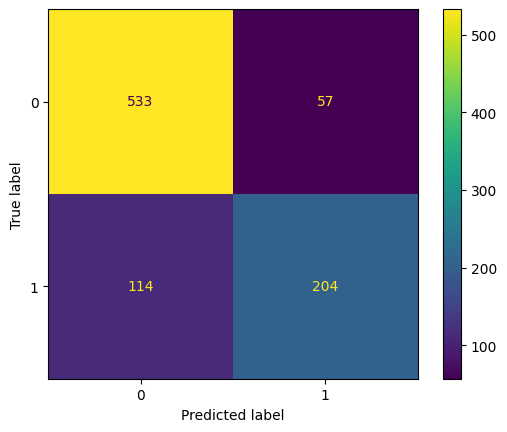

In [61]:
##table of different evaluation metrics
metrics_lr = {
    "Accuracy": accuracy_score(y_test,y_pred_lr_af),
    "Precision": precision_score(y_test, y_pred_lr_af),
    "Recall": recall_score(y_test, y_pred_lr_af),
    "F1 Score": f1_score(y_test, y_pred_lr_af),
    #"ROC AUC": roc_auc_score(X_test, x_pred_svm)
}

metrics_df_lr = pd.DataFrame(metrics_lr, index=["Score LR"])
print(metrics_df_lr)

#CONSUFION MATRIX 
cm_lr = confusion_matrix(y_test,y_pred_knn_af)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_lr)
disp.plot()

#### 6.1.4 Decision Trees (After feature Engineering)


          Accuracy  Precision    Recall  F1 Score
Score DT  0.882159   0.857627  0.795597  0.825449


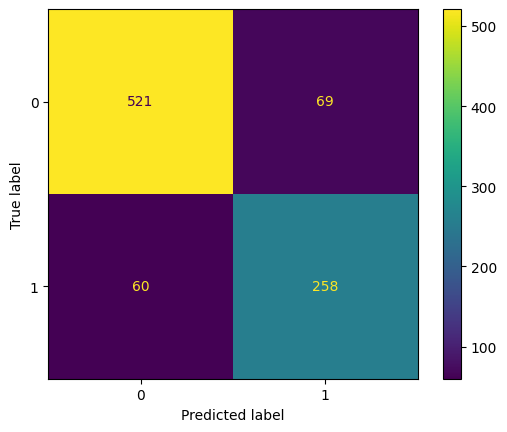

In [62]:
##table of different evaluation metrics
metrics_dt = {
    "Accuracy": accuracy_score(y_test,y_pred_dt_af),
    "Precision": precision_score(y_test, y_pred_dt_af),
    "Recall": recall_score(y_test, y_pred_dt_af),
    "F1 Score": f1_score(y_test, y_pred_dt_af),
    #"ROC AUC": roc_auc_score(X_test, x_pred_svm)
}

metrics_df_dt = pd.DataFrame(metrics_lr, index=["Score DT"])
print(metrics_df_dt)

#CONSUFION MATRIX 
cm_dt = confusion_matrix(y_test,y_pred_dt_af)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_dt)
disp.plot()

#### 6.1.5  Naive Bayes (After feature Engineering)

          Accuracy  Precision    Recall  F1 Score
Score NB  0.827093   0.776632  0.710692    0.7422


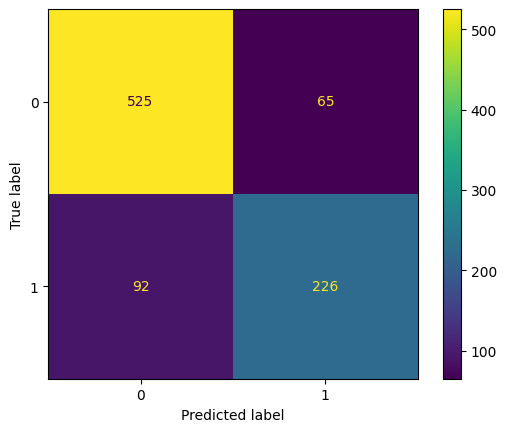

In [63]:
##table of different evaluation metrics
metrics_nb = {
    "Accuracy": accuracy_score(y_test,y_pred_nb_af),
    "Precision": precision_score(y_test, y_pred_nb_af),
    "Recall": recall_score(y_test, y_pred_nb_af),
    "F1 Score": f1_score(y_test, y_pred_nb_af),
    #"ROC AUC": roc_auc_score(X_test, x_pred_svm)
}

metrics_df_nb = pd.DataFrame(metrics_nb, index=["Score NB"])
print(metrics_df_nb)

#CONSUFION MATRIX 
cm_nb = confusion_matrix(y_test,y_pred_nb_af)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_nb)
disp.plot()

In [ ]:
f1_scores = {
    'SVM': [
        f1_score(y_test, y_pred_svm),        # before FE
        f1_score(y_test, y_pred_svm_af),     # after FE
        f1_score(y_test, y_pred_svm_tuned)   # tuned
    ],
    'KNN': [
        f1_score(y_test, y_pred_knn),        # before FE
        f1_score(y_test, y_pred_knn_af),     # after FE
        f1_score(y_test, y_pred_knn_tuned)   # tuned
    ],
    'Logistic Regression': [
        f1_score(y_test, y_pred_lr),         # before FE
        f1_score(y_test, y_pred_lr_af),      # after FE
        f1_score(y_test, y_pred_lr_tuned)    # tuned
    ],
    'Decision Tree': [
        f1_score(y_test, y_pred_dt),         # before FE
        f1_score(y_test, y_pred_dt_af),      # after FE
        f1_score(y_test, y_pred_DT_tuned)    # tuned
    ],
    'Naive Bayes': [
        f1_score(y_test, y_pred_gnb),        # before FE
        f1_score(y_test, y_pred_nb_af),      # after FE
                                            # tuned (if not available)
    ]
}


plt.scatter([0, 1, 2], f1_scores['SVM'], label='SVM')
plt.scatter([0, 1, 2], f1_scores['KNN'], label='KNN' )
plt.scatter([0, 1, 2], f1_scores['Logistic Regression'], label='Logistic Regression')
plt.scatter([0, 1, 2], f1_scores['Decision Tree'], label='Decision Tree')
plt.scatter([0, 1], f1_scores['Naive Bayes'], label='Naive Bayes')
plt.plot(f1_scores['SVM'], linestyle='dotted')
plt.plot(f1_scores['KNN'], linestyle='dotted')
plt.plot(f1_scores['Logistic Regression'], linestyle='dotted')
plt.plot(f1_scores['Decision Tree'],  linestyle='dotted')
plt.plot(f1_scores['Naive Bayes'], linestyle='dotted')
plt.xticks([0, 1, 2], ['Before FE', 'After FE', 'Tuned'])
plt.xlabel('Stage')
plt.ylabel('F1 Score')
plt.title('F1 Score Comparison Before/After Feature Engineering and Tuning')
plt.legend()
plt.show()

## 7. Conclusion